<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
        Sreeja Apparaju <br>
        Kidong Kim <br>
        Akhil Venkatesh
        </p></td></tr>
</table>

# Lecture Notebook 10.1: Yahoo Finance

## This notebook takes a look at some simple tools for looking at the stock market
 - Previously Yahooo finance had a free API for reading in historical data on stocks
 - However the Yahoo API got discontinued
 - An awesome quant made a python package that recreated this functionality by scraping the information
 
Check out the documentation for [Yfinance package](https://pypi.org/project/yfinance/)

 The package - called yfinance is not on the datahub so first we need to install it

In [62]:
try:
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

In [63]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import timedelta, date, datetime
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import warnings
from datascience import *
warnings.filterwarnings('ignore')
plt.style.use("seaborn-muted")
%matplotlib inline

## S&P 500 and the Nasdaq

The yfinance package allows us to download by stock ticker and make a Pandas Dataframe - here we will pull in by the market-wide tickers for the S&P 500 and the Nasdaq

In [64]:
data_SPNQ = yf.download(("^GSPC", '^IXIC'), start="1993-01-29", end="2022-04-05")

[*********************100%***********************]  2 of 2 completed


The following section uses the dataframe to build out a new dataframe with returns - the amount earned each day on the previous days close

In [65]:
data_SN = data_SPNQ.iloc[:, [2,3]]
data_SP =data_SPNQ.iloc[:, 0]
data_NQ = data_SPNQ.iloc[:, 1]
dSP = np.array(len(data_SP)-1)
for i in range(len(data_SP)-1):
    dat = ((data_SP[i] - data_SP[i+1])/data_SP[i])*100
    dSP = np.append(dSP,dat)
dNQ = np.array(len(data_NQ)-1)
for i in range(len(data_NQ)-1):
    dat = ((data_NQ[i] - data_NQ[i+1])/data_NQ[i])*100
    dNQ = np.append(dNQ,dat)
data_SN['SP Returns'] = dSP
data_SN['NQ Returns'] = dNQ

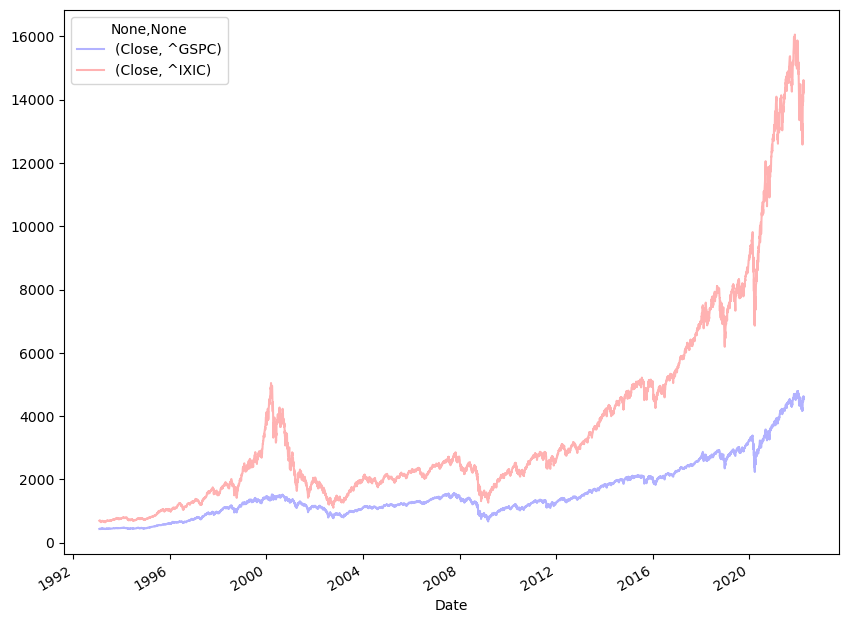

In [66]:
data_SN.iloc[:,[0,1]].plot(color = ('blue', 'red'), figsize=(10,8), alpha =0.3);

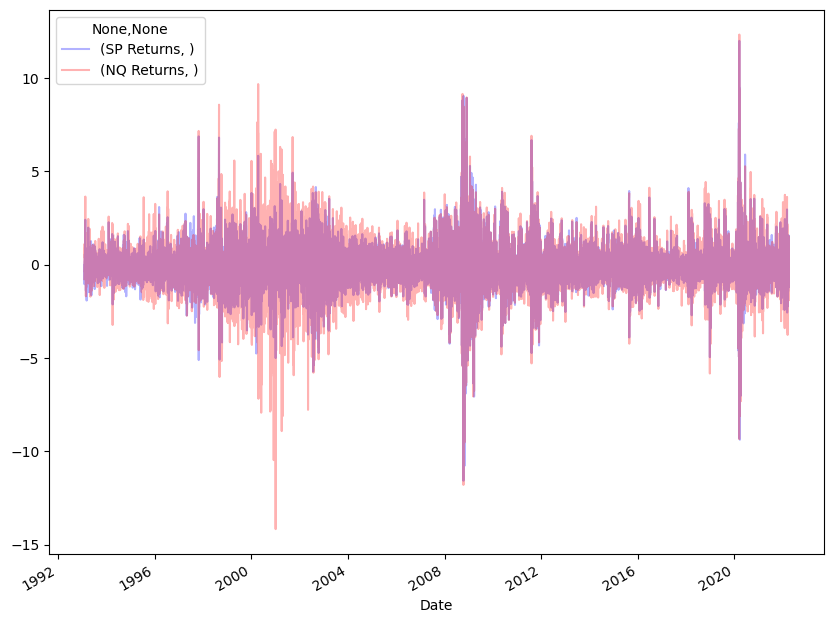

In [67]:
data_SN[['SP Returns', 'NQ Returns']].iloc[1:].plot(color = ('blue', 'red'), figsize=(10,8), alpha = 0.3);

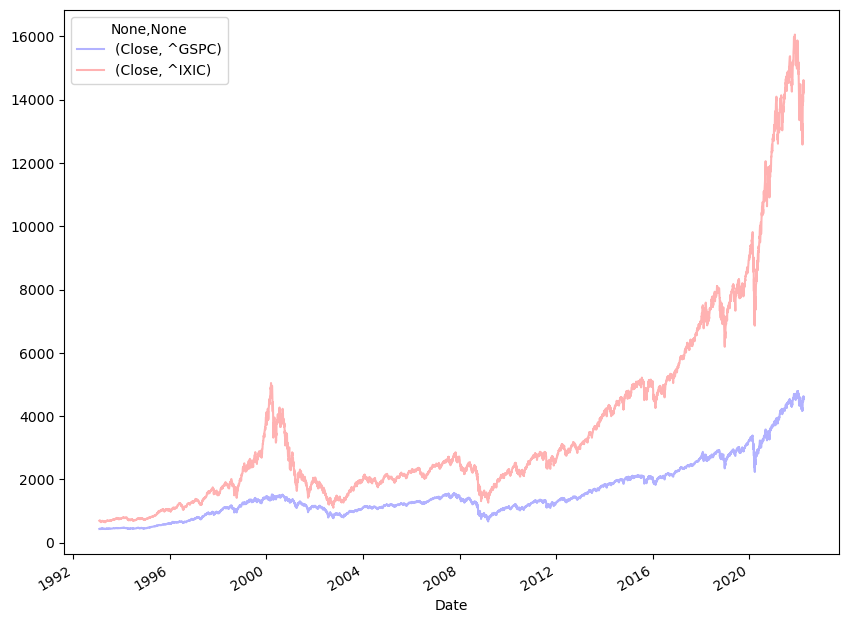

In [68]:
data_SN.iloc[:,[0,1]].plot(color = ('blue', 'red'), figsize=(10,8), alpha =0.3);

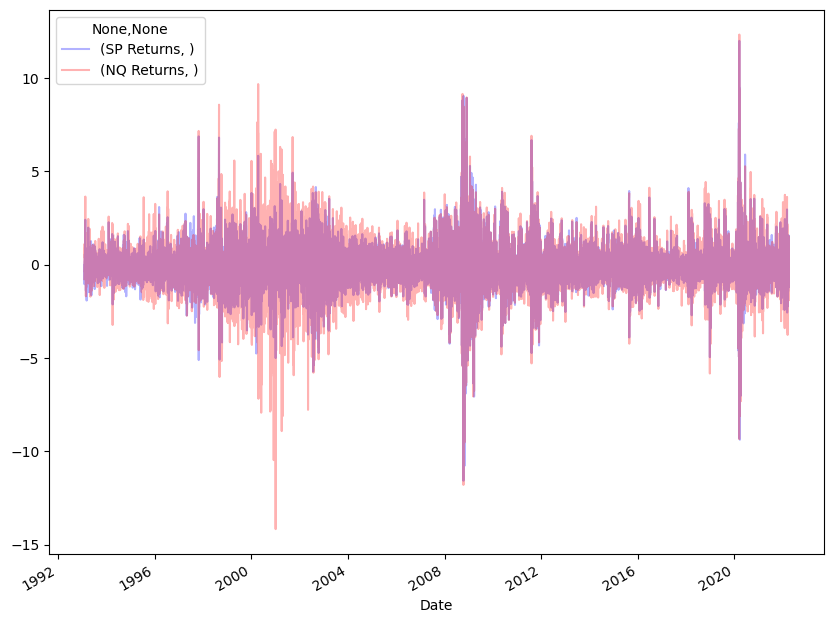

In [69]:
data_SN[['SP Returns', 'NQ Returns']].iloc[1:].plot(color = ('blue', 'red'), figsize=(10,8), alpha = 0.3);

## Let's dive deeper into the Yfinance API and and work with the data

First we will define three stocks that we want to look at more closely, and examine what sort of information we can get for each stock.  

Lets look at 
 - Meta
 - Tesla
 - USO - an ETF (exchange traded fund) that tracks the price of oil 

In [70]:
meta_ticker = yf.Ticker("meta")
tesla_ticker = yf.Ticker("tsla")
uso_ticker = yf.Ticker("uso")

There is actually a lot of information that yfinance API can provide for any equity.  In the example above we only downloaded the closing price for each of the indexes. 

In [71]:
#tesla_ticker.info

## Out of all this info - let's extract the stock prices

This will put the dates, prices, and volumes into a *Pandas* dataframe with the name of the stock

In [72]:
meta = meta_ticker.history(period="max")
tesla = tesla_ticker.history(period="max")
uso = uso_ticker.history(period="max")

In [73]:
tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-20 00:00:00-04:00,279.559998,280.929993,261.200012,262.899994,175158300,0.0,0.0
2023-07-21 00:00:00-04:00,268.000000,268.000000,255.800003,260.019989,161050100,0.0,0.0
2023-07-24 00:00:00-04:00,255.850006,269.850006,254.119995,269.059998,136508500,0.0,0.0


## Let's look at the Meta price 
 - What movements can we pick up with our eyes?
 - Meta just about died in 2016 - then it picked back up!   


In [74]:
#tesla.loc[date(2022, 4, 14):date(2022, 10, 27)]
date(2022, 7, 14)

datetime.date(2022, 7, 14)

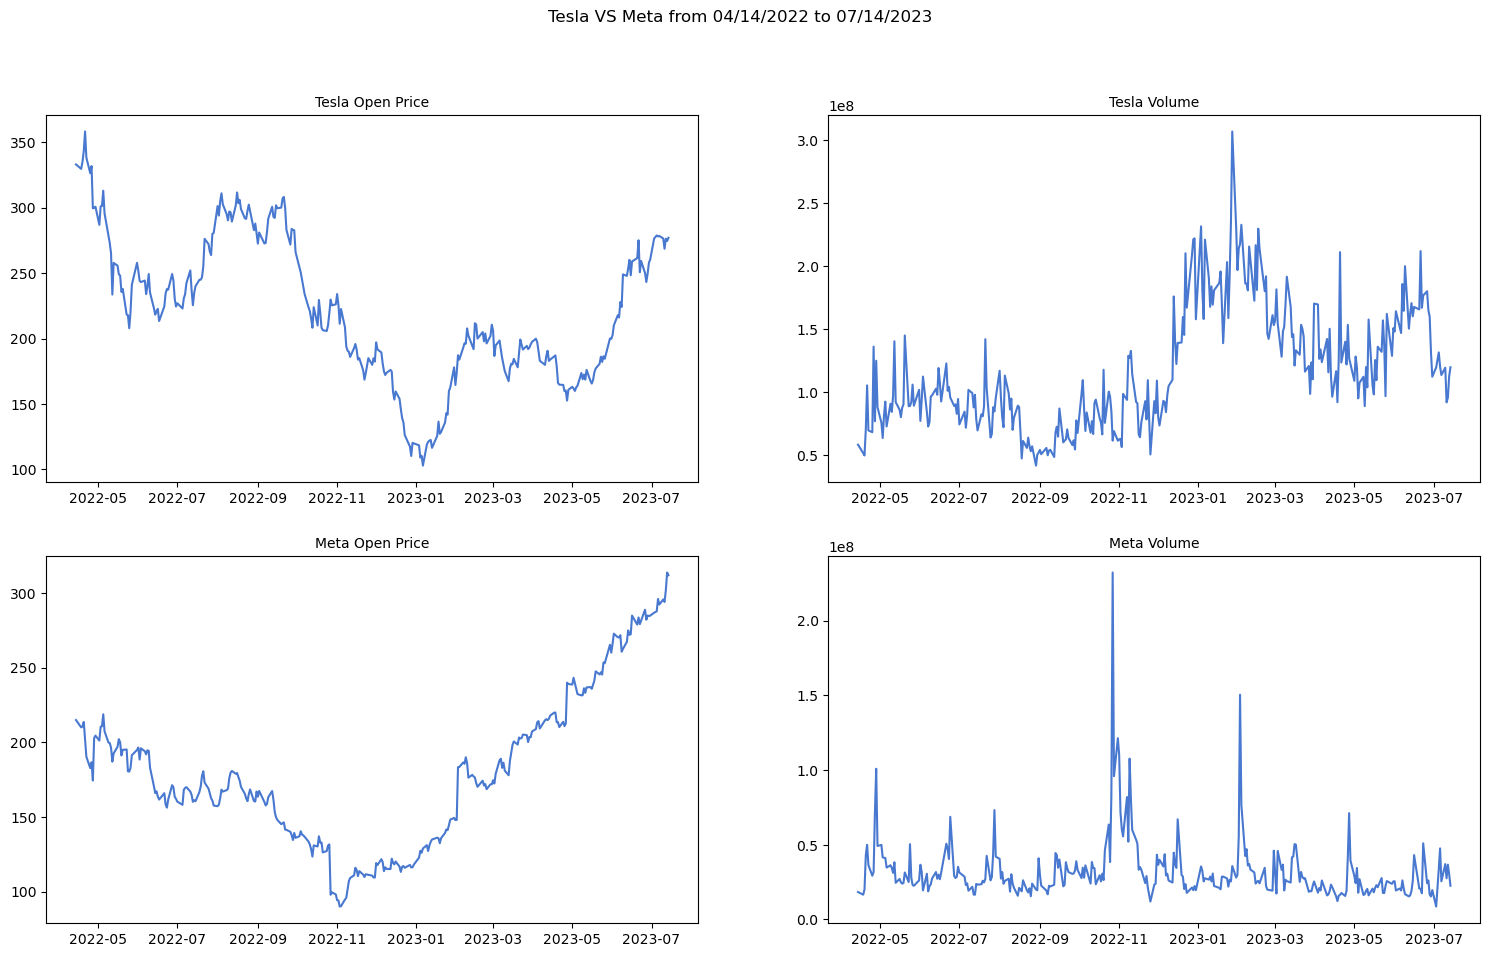

In [75]:
def tesla_meta(date1, date2):
    tesla_2 = tesla.loc[date1:date2]
    meta_2 = meta.loc[date1:date2]

    tesla_index = tesla_2.index
    meta_index = meta_2.index

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.suptitle("Tesla VS Meta from "+date1.strftime("%m/%d/%Y")+" to "+date2.strftime("%m/%d/%Y"))
    fig.set_size_inches(18.5, 10.5)

    ax1.plot(tesla_index, tesla_2["Open"])
    ax1.set_title("Tesla Open Price", fontsize=10)
    ax2.plot(tesla_index, tesla_2["Volume"])
    ax2.set_title("Tesla Volume", fontsize=10)
    ax3.plot(meta_index, meta_2["Open"])
    ax3.set_title("Meta Open Price", fontsize=10)
    ax4.plot(meta_index, meta_2["Volume"])
    ax4.set_title("Meta Volume", fontsize=10)

tesla_meta(date(2022, 4, 14), date(2023, 7, 14))

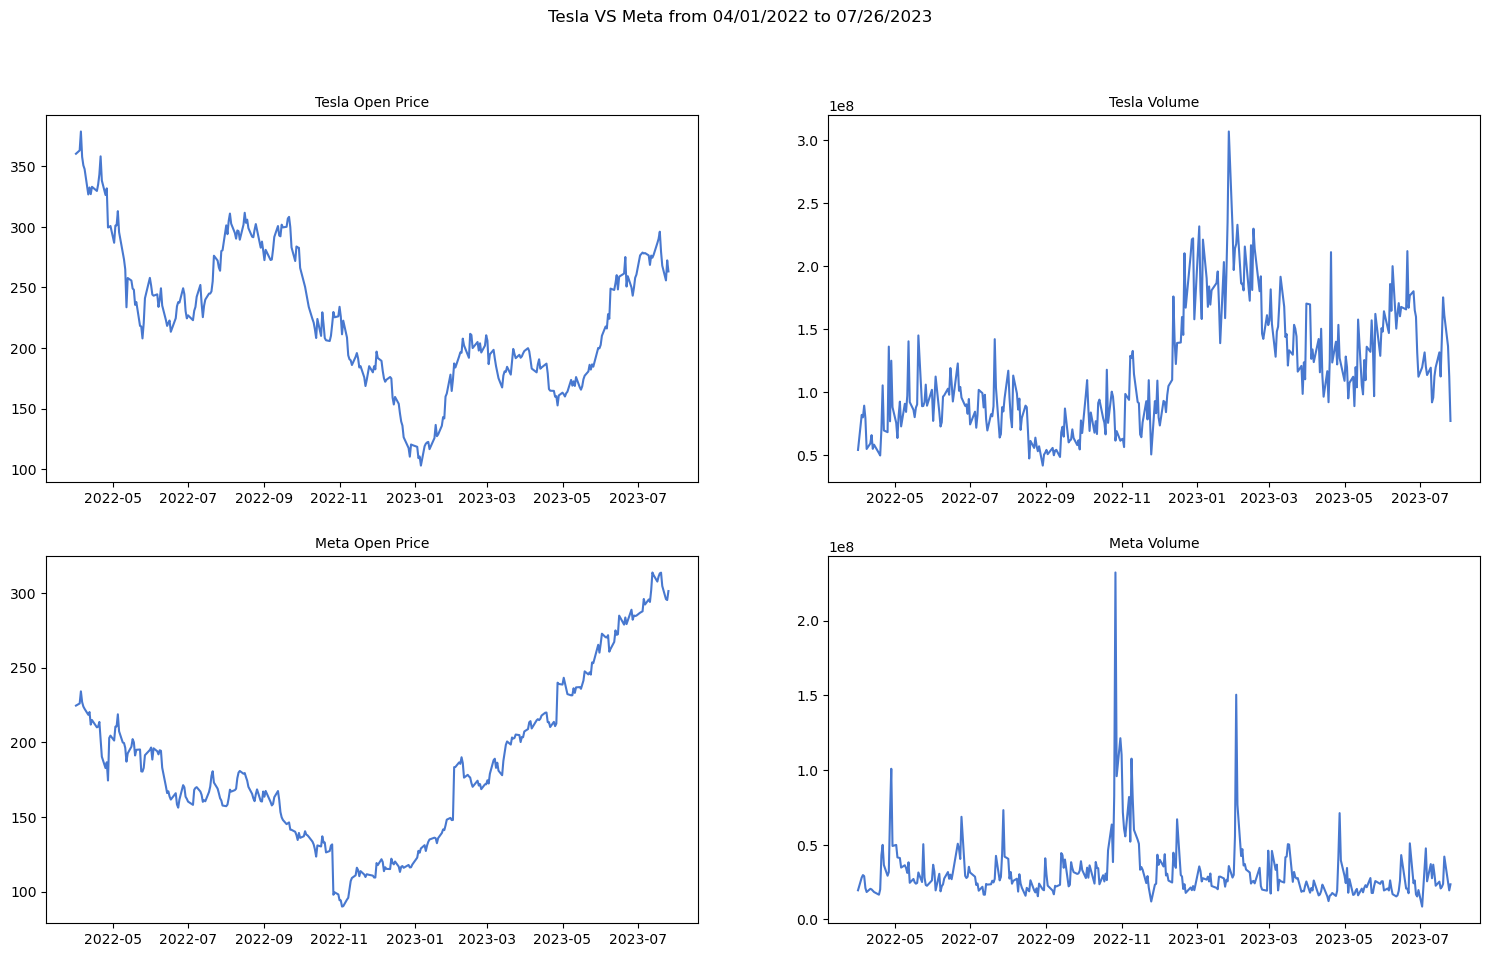

In [76]:
tesla_meta(date(2022, 4, 1), datetime.now())